In [100]:
# 분석 라이브러리
import numpy as np 
import pandas as pd
import random as rnd
# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
#etc
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#ML
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(20, 10))
plt.rc('font', size=20)

<Figure size 1440x720 with 0 Axes>

In [101]:
# colab 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [102]:
# 현재 폴더 경로 확인
import os
os.getcwd()

'/content/gdrive/My Drive/content/sample_data'

In [103]:
# 폴더 이동 "/content/gdrive/MyDrive"
os.chdir('/content/gdrive/MyDrive/content/sample_data')

In [104]:
# 현재 경로의 하위 폴더, 파일 확인
os.listdir()

['pokemonByType.csv', 'train.csv', 'test.csv', 'titanic.csv']

In [105]:
# 훈련데이터 셋과 테스트 데이터셋을 불러옵니다.
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

'''
PassengerID = 탑승객의 고유 아이디
Survived = 생존유무(0: 사망, 1: 생존)
PClass = 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
Name = 이름
Sex = 성별
Age = 나이
SibSP = 함께 탑승한 형제자매, 아내, 남편의 수
Parch = 함께 탑승한 부모, 자식의 수
Ticket = 티켓 번호
Fare = 티켓의 요금
Cabin = 객실번호
Embarked = 배에 탑승한 위치(C = Cherboug, Q=Queenstown, S=Southampton)
'''


'\nPassengerID = 탑승객의 고유 아이디\nSurvived = 생존유무(0: 사망, 1: 생존)\nPClass = 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)\nName = 이름\nSex = 성별\nAge = 나이\nSibSP = 함께 탑승한 형제자매, 아내, 남편의 수\nParch = 함께 탑승한 부모, 자식의 수\nTicket = 티켓 번호\nFare = 티켓의 요금\nCabin = 객실번호\nEmbarked = 배에 탑승한 위치(C = Cherboug, Q=Queenstown, S=Southampton)\n'

In [106]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 2. 탐색적 자료분석(Exploratory Data Anaylysis, EDA)

pd.DataFrame.head()

*  데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
*  n의 기본 값(default 값)은 5

pd.DataFrame.tail()

* 데이터프레임의 아래에서 부터 n개 행을 보여주는 함수
* n의 기본 값은 5


pd.DataFrame.shape

* 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

pd.DataFrame.info()

* 데이터셋의 column별 정보를 알려주는 함수
* 비어 있지 않은 값은 (non-null)은 몇개인지?
* column의 type은 무엇인지?
* type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)


pd.DataFrame.describe()


* 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

* 기술통계량이란?
> ㅇ 해당 column을 대표할 수 있는 통계값들을 의미



* 기술통계량 종류


> ㅇ count: 해당 column에서 비어 있지 않은 값의 개수

> ㅇ mean: 평균

> ㅇ std: 표준편차

> ㅇ min: 최솟값 (이상치 포함)

> ㅇ 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값

> ㅇ 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)

> ㅇ 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값

> ㅇ max: 최댓값 (이상치 포함)

* 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함

> ㅇ 아래쪽 울타리: Q_1Q1​ - 1.5 * IQR1.5∗IQR

> ㅇ 위쪽 울타리: Q_3Q3​ + 1.5 * IQR1.5∗IQR

> ㅇ IQRIQR = Q_3 - Q_1Q3​−Q1​




In [108]:
train_df.info()

print('-'*100)

test_df.info()
# Age의 결측치 처리가 필요함을 알 수 있습니다.
# Cabin의 결측치가 많음 해당 결측치를 어떻게 처리해야 할지 고민해야함 결측치 처리가 완료된 Cabin컬럼을 이용하여 새로운 feature를 발견하는것이 중요합니다.
# Embarked의 결측치 또한 존재합니다. 이를 어떻게 처리하면 좋을지 고민해보아야 합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtyp

In [109]:
display(train_df.describe(include='all').T[1:].style.bar(subset=['mean', 'std', '50%', 'max'], color='#a2a220'))


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.000000,nan,nan,nan,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,nan,nan,nan,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Name,891,891,"Cleaver, Miss. Alice",1,nan,nan,nan,nan,nan,nan,nan
Sex,891,2,male,577,nan,nan,nan,nan,nan,nan,nan
Age,714.000000,nan,nan,nan,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,nan,nan,nan,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,nan,nan,nan,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Ticket,891,681,347082,7,nan,nan,nan,nan,nan,nan,nan
Fare,891.000000,nan,nan,nan,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Cabin,204,147,B96 B98,4,nan,nan,nan,nan,nan,nan,nan


In [110]:
print('==================생존자의 나이 Describe==============')

survived_df = train_df.loc[train_df['Survived'] == 1]

age_df = survived_df['Age'].describe(include='all')

display(age_df)

print('==================사망자의 나이 Describe==============')

nonsurvived_df = train_df.loc[train_df['Survived'] == 0]

age_df = nonsurvived_df['Age'].describe(include='all')

display(age_df)

==================생존자의 나이 Describe==============


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

==================사망자의 나이 Describe==============


count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

# 나이에 의한 비교

==================생존여부에 대한 나이 비교 BoxPlot==============


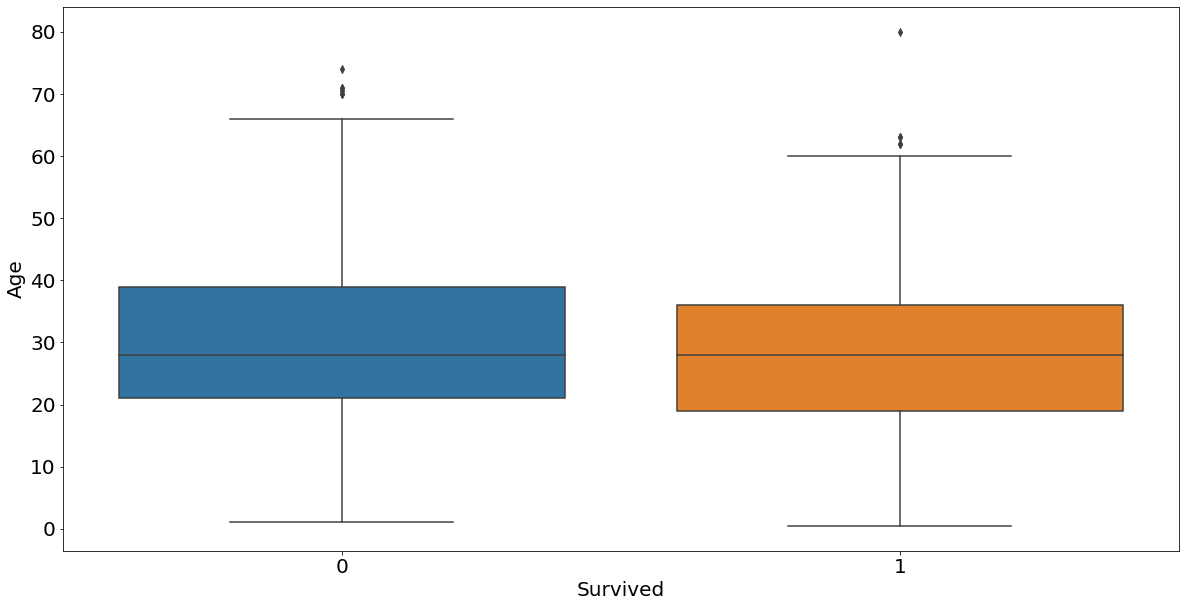

In [111]:
print('==================생존여부에 대한 나이 비교 BoxPlot==============')

plt.figure(figsize=(20, 10))
plt.rc('font', size=20)
sns.boxplot(data=train_df, x='Survived', y='Age')

plt.show()

# 성별에 의한 비교

==================생존여부에 대한 성별 비교 카이제곱 검정==============


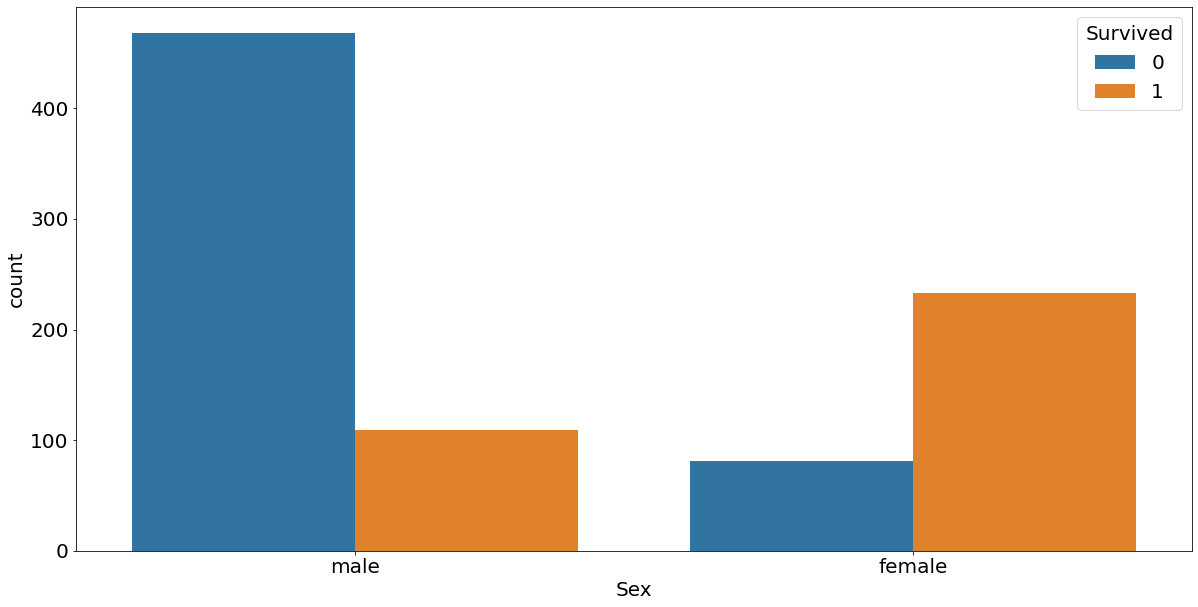

Survived,0,1
Sex,,
female,81,233
male,468,109


chi2 : 263.05057407065567
p-value : 3.711747770113424e-59
검증결과 : 귀무가설 기각 / 즉, 성별과 생존여부는 관계가 있다.


In [112]:
## Sex와 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)

print('==================생존여부에 대한 성별 비교 카이제곱 검정==============')

from scipy.stats import chi2_contingency
import pandas as pd

plt.figure(figsize=(20, 10))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.show()


df_p_cross = pd.crosstab(train_df['Sex'], train_df['Survived'])

chi2, p, dof, ef = chi2_contingency(df_p_cross, correction=False)

display(df_p_cross)

print("chi2 : {}". format(chi2))
print("p-value : {}". format(p))

if p < 0.05:
  print("검증결과 : 귀무가설 기각 / 즉, 성별과 생존여부는 관계가 있다.")
else:
  print("검증결과 : 귀무가설 채택 / 즉, 성별과 생존여부는 관계가 없다(독립이다).")


==================생존여부에 대한 객실등급 비교 카이제곱 검정==============


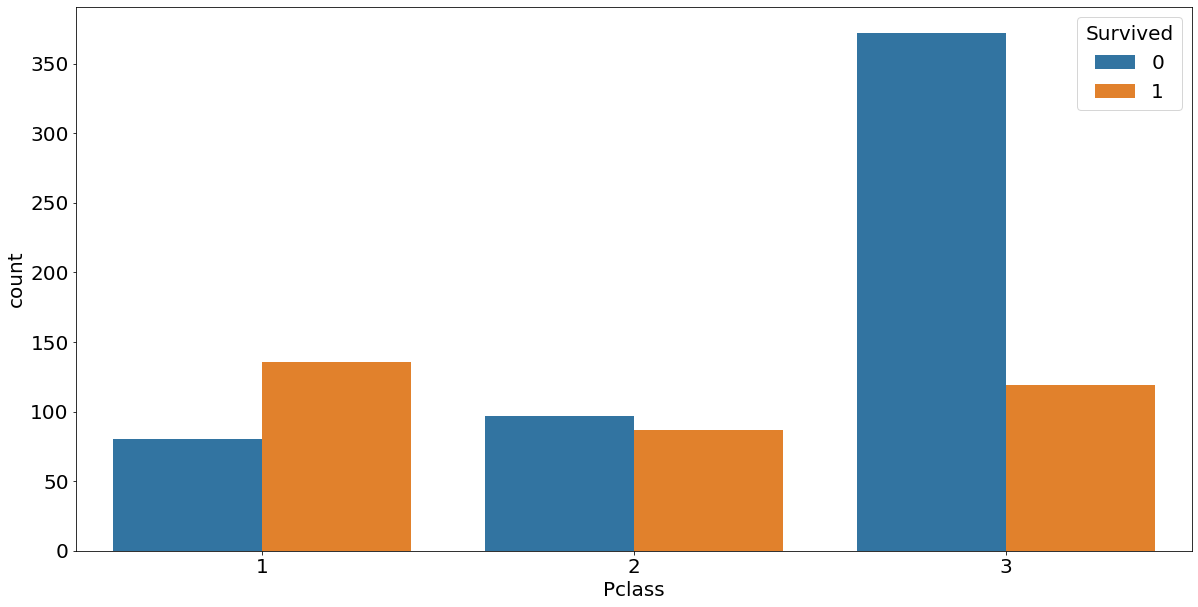

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


chi2 : 102.88898875696056
p-value : 4.549251711298793e-23
검증결과 : 귀무가설 기각 / 즉, Pclass와 생존여부는 관계가 있다.


In [113]:
## Pclass와 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)

print('==================생존여부에 대한 객실등급 비교 카이제곱 검정==============')

plt.figure(figsize=(20, 10))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.show()

df_p_cross = pd.crosstab(train_df['Pclass'], train_df['Survived'])

chi2, p, dof, ef = chi2_contingency(df_p_cross, correction=False)

display(df_p_cross)

print("chi2 : {}". format(chi2))
print("p-value : {}". format(p))

if p < 0.05:
  print("검증결과 : 귀무가설 기각 / 즉, Pclass와 생존여부는 관계가 있다.")
else:
  print("검증결과 : 귀무가설 채택 / 즉, Pclass과 생존여부는 관계가 없다(독립이다).")

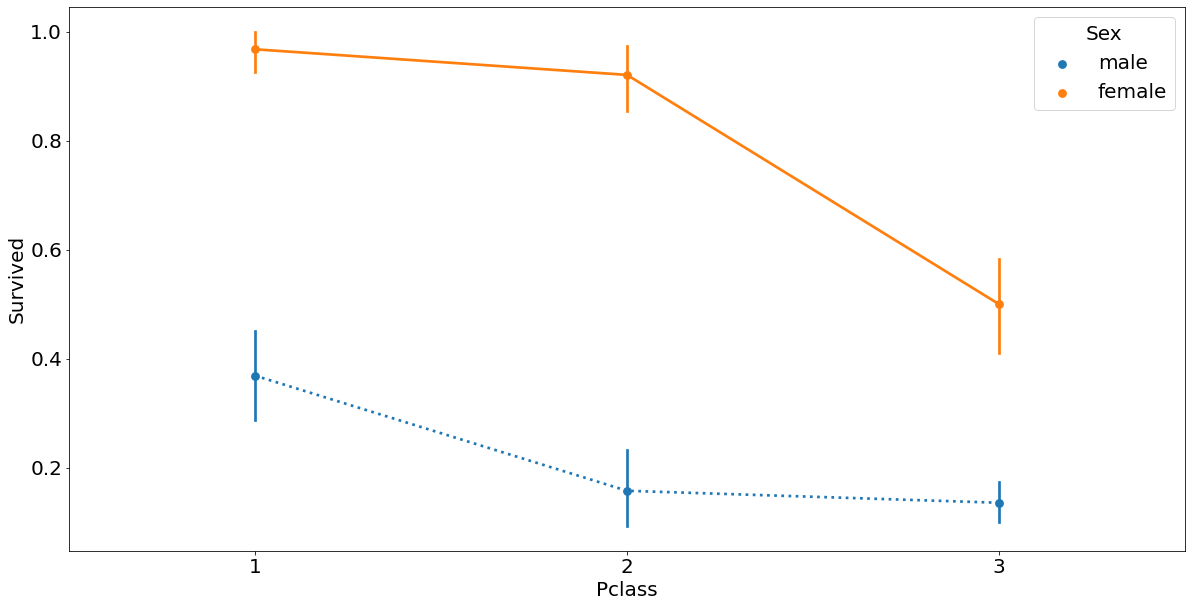

 객실의 등급(1, 2등급)이 높을 수록 생존자가 더 많음


In [114]:
plt.figure(figsize=(20, 10))
sns.pointplot(data=train_df, 
              x='Pclass',
              y='Survived',
              hue='Sex',
              linestyles=[':', '-']              
              )
plt.show()

print(" 객실의 등급(1, 2등급)이 높을 수록 생존자가 더 많음")

#Name 컬럼 분석

In [115]:
## Name에서 호칭(Miss, Mr)feature 추출
train_df['Name_new'] = train_df['Name'].str.split(',', expand=True)[1]      ### 이름 부분 분리
train_df['Call_name'] =train_df['Name_new'].str.split('.', expand=True)[0]  ### 호칭부분 분리
train_df['Call_name'] = train_df['Call_name'].apply(lambda x : x.strip())   ### 앞뒤 공백 제거 수행
train_df = train_df.drop(columns=['Name_new'])

In [116]:
train_df['Call_name'].value_counts() ## 호칭별 수량 확인

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Don               1
Lady              1
Capt              1
Jonkheer          1
Mme               1
Ms                1
Sir               1
Name: Call_name, dtype: int64

In [117]:
## 호칭 범주화 조정
# Master, Rev, Major, Col, Capt, Jonkheer, Sir, Don => Mr  
# Mlle, Mme, Ms => Miss
# the Countess, Lady => Mrs
# Dr의 경우 여성, 남성 구분

train_df.loc[train_df['Call_name'].isin(['Master', 'Rev', 'Major', 'Col', 'Capt', 'Jonkheer', 'Sir', 'Don']), 'Call_name'] = 'Mr'
train_df.loc[train_df['Call_name'].isin(['Mlle', 'Mme', 'Ms']), 'Call_name'] = 'Miss'
train_df.loc[train_df['Call_name'].isin(['the Countess', 'Lady']), 'Call_name'] = 'Mrs'
train_df.loc[(train_df['Call_name'] == 'Dr') & (train_df['Sex'] == 'male'), 'Call_name'] = 'Mr'
train_df.loc[(train_df['Call_name'] == 'Dr') & (train_df['Sex'] == 'female'), 'Call_name'] = 'Mrs'
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Call_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [118]:
train_df['Call_name'].value_counts() ## 호칭 범주화 조정 결과

Mr      577
Miss    186
Mrs     128
Name: Call_name, dtype: int64

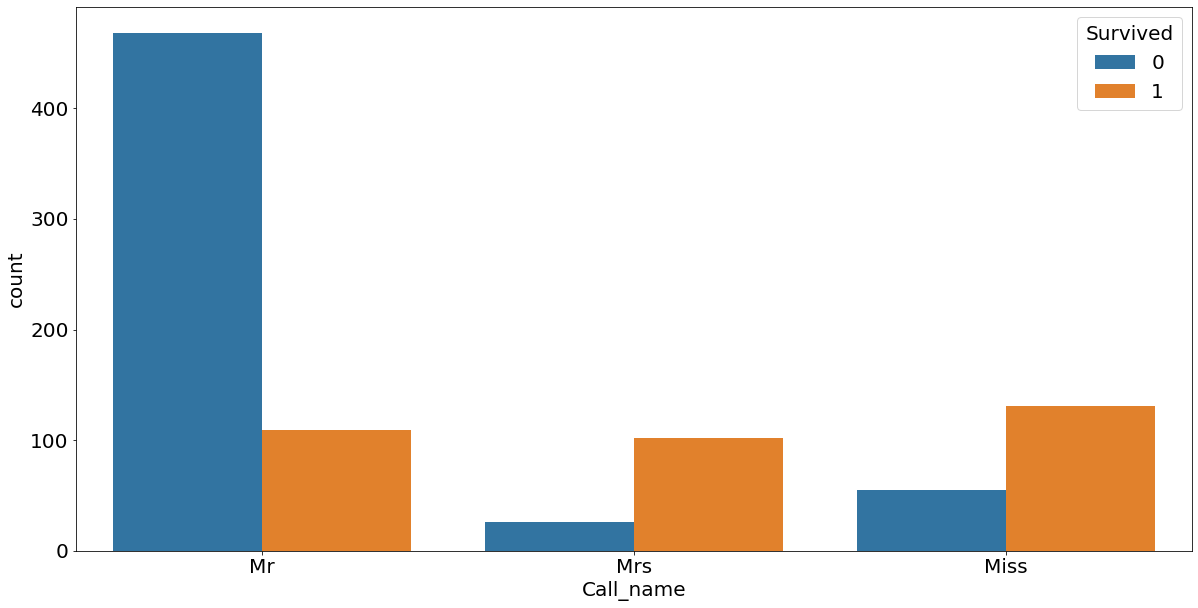

In [119]:
## Name 호칭별 생존률 분석
plt.figure(figsize=(20, 10))
sns.countplot(data=train_df, x='Call_name', hue='Survived')

In [120]:
## 여성 호칭과 생존여부가 관계가 있는지 통계적 가설 검정 수행(카이제곱 검정)
df_a = train_df[train_df['Sex']=='female']
from scipy.stats import chi2_contingency
import pandas as pd

df_cross = pd.crosstab(df_a['Call_name'], df_a['Survived']) ## 두 범주형 변수의 교차표를 생성
chi2, p, dof, ef = chi2_contingency(df_cross, correction=False) ## 검정통계량, p-value, 자유도, 기대도수

display(df_cross)
print("chi2 : {}".format(chi2))
print("p-value : {}".format(p))
if p < 0.05:
    print("검증 결과 : 귀무가설 기각 / 즉, 여성의 Call_name과 생존여부는 관계가 있다")
else:
    print("검증 결과 : 귀무가설 채택 / 즉, 여성의 Call_name과 생존여부는 관계가 없다(독립이다)")

Survived,0,1
Call_name,,
Miss,55,131
Mrs,26,102


chi2 : 3.394602874676176
p-value : 0.06541011249184824
검증 결과 : 귀무가설 채택 / 즉, 여성의 Call_name과 생존여부는 관계가 없다(독립이다)


<Figure size 1440x720 with 0 Axes>

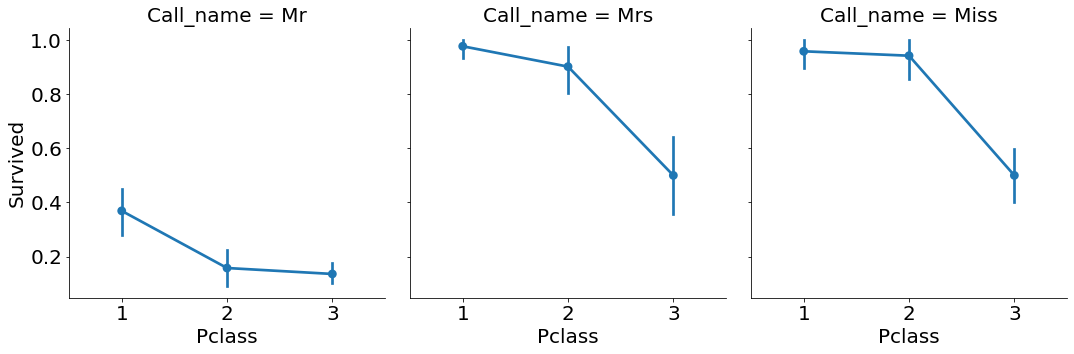

In [121]:
plt.figure(figsize=(20, 10))
sns.catplot(data=train_df, col='Call_name', x='Pclass', y='Survived', kind='point')
plt.show()

# Age 컬럼 분석

In [122]:
train_df.groupby('Call_name')['Age'].median()

Call_name
Miss    21.5
Mr      29.0
Mrs     35.0
Name: Age, dtype: float64

In [123]:
## Age 결측값 채우기
train_df.loc[(train_df['Age'].isnull()) & (train_df['Call_name'] == 'Miss'), 'Age'] = 21.5
train_df.loc[(train_df['Age'].isnull()) & (train_df['Call_name'] == 'Mrs'), 'Age'] = 35.0
train_df.loc[(train_df['Age'].isnull()) & (train_df['Call_name'] == 'Mr'), 'Age'] = 29.0

In [124]:
## 결측값 여부 확인
train_df['Age'].isnull().sum()

0

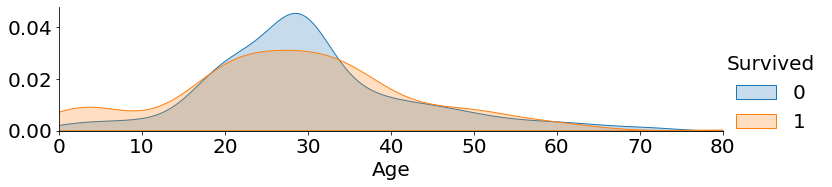

In [125]:
## 결측값 채운 후 연령에 따른 생존여부 시각화
facet=sns.FacetGrid(train_df,hue="Survived", aspect=3.5)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train_df['Age'].max()))
facet.add_legend()

In [126]:
train_df.columns
# 세부 컬럼은 아래와 같습니다.
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034934,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.070099,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.350558,0.083081,0.018443,-0.549500
Age,0.034934,-0.070099,-0.350558,1.000000,-0.243238,-0.176028,0.101053
SibSp,-0.057527,-0.035322,0.083081,-0.243238,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176028,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.101053,0.159651,0.216225,1.000000


In [152]:
X_Train = train_df.drop("Survived",axis=1)
Y_Train = train_df["Survived"]

In [175]:
from sklearn.model_selection import train_test_split

XX_train, XX_test, YY_Train, YY_test = train_test_split(X_Train, Y_Train, test_size=0.33)

XX_train

,Age,SibSp,Parch,Fare,Call_name,First,Second,Third,Female,Male,S,C,Q
618,4,2,1,39.0000,Miss,0,1,0,1,0,0,0,1
382,32,0,0,7.9250,Mr,0,0,1,0,1,0,0,1
201,29,8,2,69.5500,Mr,0,0,1,0,1,0,0,1
138,16,0,0,9.2167,Mr,0,0,1,0,1,0,0,1
614,35,0,0,8.0500,Mr,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,21,3,1,25.4667,Miss,0,0,1,1,0,0,0,1
168,29,0,0,25.9250,Mr,1,0,0,0,1,0,0,1
282,16,0,0,9.5000,Mr,0,0,1,0,1,0,0,1
92,46,1,0,61.1750,Mr,1,0,0,0,1,0,0,1
